#### single layer perceptron (SLP)
A single layer perceptron (SLP) is a feed-forward network based on a threshold transfer function. 
SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target (1 , 0).
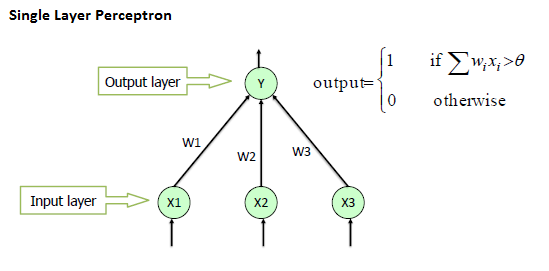

#### Algorithm		
The single layer perceptron does not have a priori knowledge, so the initial weights are assigned randomly. SLP sums all the weighted inputs and if the sum is above the threshold (some predetermined value), SLP is said to be activated (output=1). 	
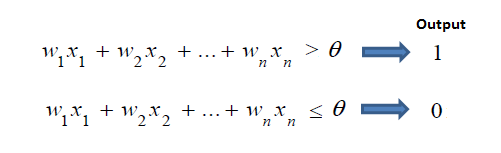
The input values are presented to the perceptron, and if the predicted output is the same as the desired output, then the performance is considered satisfactory and no changes to the weights are made. However, if the output does not match the desired output, then the weights need to be changed to reduce the error. 
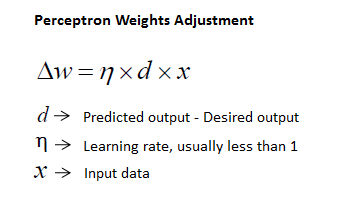
Because SLP is a linear classifier and if the cases are not linearly separable the learning process will never reach a point where all the cases are classified properly. 
The most famous example of the inability of perceptron to solve problems with linearly non-separable cases is the XOR problem.
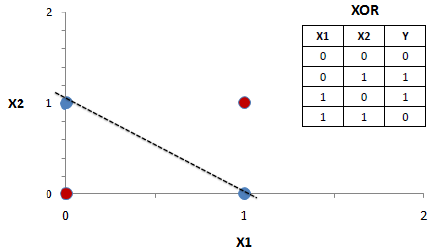
However, a multi-layer perceptron using the backpropagation algorithm can successfully classify the XOR data.
https://www.saedsayad.com/artificial_neural_network_bkp.htm

In [3]:
import numpy as np

In [22]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)
    
    def _relu_func(self, x):
        return np.maximum(x, 0)

X_train shape: (20, 2)
y_train shape: (20, 1)
predictions: [0.         0.         0.97721255 0.43497971], y_test: [0 0 1 1]
Perceptron classification accuracy 0.5


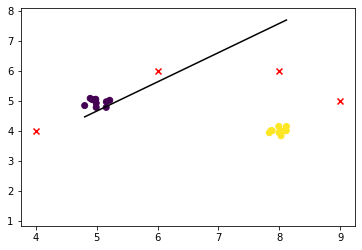

In [27]:
# Imports
import matplotlib.pyplot as plt
    
# Testing
if __name__ == "__main__":


    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    # Test case
    data1 = np.random.normal(loc=(8, 4), scale=0.1, size=(10, 2))
    label1 = np.ones((10, 1))
    data2 = np.random.normal(loc=(5, 5), scale=0.1, size=(10, 2))
    label2 = np.zeros((10, 1))
    X_train = np.vstack((data1, data2))
    y_train = np.vstack((label1, label2))
    print("X_train shape: {}".format(X_train.shape))
    print("y_train shape: {}".format(y_train.shape))
    
    X_test = np.array([[6, 6], [4, 4], [9, 5], [8, 6]])
    y_test = np.array([[0], [0], [1], [1]])

    p = SingleLayerPerceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    
    print("predictions: {}, y_test: {}".format(predictions, y_test.flatten()))
    print("Perceptron classification accuracy", accuracy(y_test.flatten(), predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c='r')

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()